# Ejercicio: Presa de Gravedad con elemento de 3 nodos.



## 1. Enunciado

La figura representa una sección de presa de gravedad, la cual se va a analizar mediante el MEF como un problema de elasticidad bidimensional, de tensión plana. 

<img src="presa_triangulares.PNG" width="50%" height="50%"/>

En la figura, el parámetro h3 = h2/2. Se han tomado 8 nodos y 6 elementos, referenciados mediante las letras a,b,c,d,e,f.  

La figura muestra la presión correspondiente a la carga hidráulica. Esta presión está aplicada sobre el paramento vertical, variable en función de $y$. El valor máximo es $Q$.

Determinar: 
- Vector de fuerzas nodales debidas a la presión de agua, en el nodo 5. 
-  Vector de fuerzas nodales debido a peso propio, en el nodo 4. 
-  Determinar el término de la matriz de rigidez $\mathbf{K_{58}}$.


**Parámetros**
- h1: 10 m 
- h2: 50 m
- h3 = 25 m (puesto que vale h2/2)
- b1 = 50 m. 
- b2 = 5 m. 
- Peso específico del agua: 10 kN/m$^3$. 
- Peso específico del hormigón: 25 kN/m$^3$. 
- Módulo de elasticidad $E = 30$ GPa. 
- Coeficiente de Poisson: 0.25


In [1]:
from sympy import init_session
init_session()

IPython console for SymPy 1.0 (Python 2.7.11-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.0/


A continuación se definen los símbolos y las funciones de forma (tomadas del cuaderno del MEF-Elemento Triangular)

In [2]:
x1,y1,x2,y2,x3,y3,A = symbols('x1 y1 x2 y2 x3 y3 A',real=True) # Se definen como reales para evaluación posterior.
N1 = (x*(y2 - y3) + x2*y3 - x3*y2 - y*(x2 - x3))/(2*A) 
N2 = (-x*(y1 - y3) - x1*y3 + x3*y1 + y*(x1 - x3))/(2*A)
N3 = (x*(y1 - y2) + x1*y2 - x2*y1 - y*(x1 - x2))/(2*A)

## 2. Determinación de las fuerzas nodales en el elemento triangular.

El vector de fuerzas debido a tensiones en el contorno se calcula mediante una integral de línea, que sólo afecta a los lados cargados (es decir, en los que esté definida la tensión exterior $\mathbf{t}$). 

Para un elemento dado, la fuerza nodal equivalente se obtiene evaluando la siguiente integral:

\begin{equation}
\mathbf{f}_t = \int_{\Gamma} \mathbf{N}^T \cdot \mathbf{t} \,d \Gamma
\end{equation}

Como se ha indicado anteriormente, $\Gamma$ afecta únicamente a los lados en los que se define una tensión exterior aplicada $\mathbf{t}$. 

Considerando un sistema de referencia local, en el cual los nodos está numerados como 1-2-3, la matriz de funciones de forma puede escribirse en función de las matrices de los nodos 1, 2 y 3, como sigue: 

\begin{equation}
\mathbf{N} = \left( \begin{matrix} \mathbf{N_1} & \mathbf{N_2} & \mathbf{N_3} \end{matrix} \right) 
\end{equation}

Y por tanto, 

\begin{equation}
\mathbf{f}_t = \int_{\Gamma} \left( \begin{matrix} \mathbf{N_1} & \mathbf{N_2} & \mathbf{N_3} \end{matrix} \right)^T \cdot \mathbf{t} \,d \Gamma
\end{equation}

El vector $\mathbf{f}_t$ puede a su vez escribirse en función de las componentes del nodo 1, 2 y 3. 

\begin{equation}
\mathbf{f}_t = \begin{pmatrix} \mathbf{f}_{1} \\ \mathbf{f}_{2} \\  \mathbf{f}_{3}\end{pmatrix}
\end{equation}

Finalmente, las componentes vectoriales de $\mathbf{f}_t$ pueden calcularse como: 

\begin{equation}
\begin{pmatrix} \mathbf{f}_{1} \\ \mathbf{f}_{2} \\  \mathbf{f}_{3}\end{pmatrix} = 
\begin{pmatrix} \int_{\Gamma} \mathbf{N_1}^T \cdot \mathbf{t} \, d\ \Gamma \\ 
\int_{\Gamma} \mathbf{N_2}^T \cdot \mathbf{t}\,d\ \Gamma \\ \int_{\Gamma} \mathbf{N_3}^T  \cdot \mathbf{t}\,d \Gamma
\end{pmatrix}
\end{equation}

### Componentes del vector tensión

El vector $\mathbf{t}$ puede escribirse como: 

\begin{equation}
\mathbf{t} = \begin{pmatrix} t_x \\ t_y \end{pmatrix}
\end{equation}

La figura muestra la carga hidrostática. Claramente, la componente $t_y$ es nula. La componente $t_x$ varía en función de $y$. Considerando el sistema de referencia $x,y$ de la figura, y teniendo en cuenta la variación lineal de la carga, puede definirse la función $t_x(y)$ como sigue:  

\begin{equation}
t_x(y) = Q - \dfrac{Q}{h1 + h2}\,y
\end{equation}

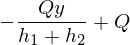

In [3]:
h1, h2, Q  = symbols('h1 h2 Q',real=True)
tx = Q - Q / (h1 + h2) * y
tx

### Determinación del vector de fuerzas en el nodo 5. 

El vector de fuerzas en el nodo 5 incluye componentes en los elementos $d$ y $f$, pues son  los elementos que tienen el nodo 5 en común y que tienen un lado cargado.

\begin{equation}
\mathbf{f}_5 = \mathbf{f}_5^{d + f} = \mathbf{f}_5^d +  \mathbf{f}_5^f
\end{equation}

### 2.1. Determinación del vector de fuerzas en 5 debido al elemento _d_

Para este elemento se debe plantear una referencia local, en la que se renumeran los nodos como 1-2-3. En este caso, se ha elegido la numeración 3-6-5 como la 1-2-3, según se muestra la figura. Nótese que esta elección es arbitraria, y cualquiera de los tres nodos (3,6,5) puede elegirse como nodo 1. Lo importante es que, una vez fijado el nodo al que se asigna el 1, el resto de nodos respeten el sentido mostrado en la figura (pues sólo así las funciones de forma pueden expresarse en función del área $A$ en valor absoluto). 

<img src="presa_elementod.PNG" width="50%" height="50%"/>


El nodo 5 del elemento _d_ es el nodo 3 en la referencia local. Por tanto, se determinará la integral siguiente: 

\begin{equation}
\mathbf{f}_5^d = \int_{\Gamma_d} \mathbf{N_{3}}^T \cdot \mathbf{t}\,d \Gamma
\end{equation}

En esta integral, $\Gamma_d$ se refiere a la línea del elemento _d_ en la que está definido $\mathbf{t}$. 


\begin{equation}
\mathbf{f}_5^d = \int_{\Gamma_d} \left( \begin{matrix} N_3 & 0 \\ 0 & N_3 \end{matrix} \right) \cdot \begin{pmatrix} t_x \\ t_y \end{pmatrix} \,d \Gamma
\end{equation}

Teniendo en cuenta que $t_y = 0$ y que $t_x$ es una función de $y$ (pues corresponde con la carga hidráulica}, definida anteriormente, es fácil determinar la integral anterior, la cual se extiende al lado 1-3 en coordenadas locales, pues es el lado que está cargado. 

La carga nodal se obtiene mediante la siguiente integral, en $y$, particularizando la función de forma $N_3(x,y)$ en un punto de la línea vertical del paramento cargado, es decir, en un punto de la forma $(0,y)$. 

\begin{equation}
\mathbf{f}_5^d = \int_{y=h3}^{y = 2\, h3} \left( \begin{matrix} N_3(0,y) & 0 \\ 0 & N_3(0,y) \end{matrix} \right) \cdot \begin{pmatrix} t_x(y) \\ 0 \end{pmatrix} \,d y = \begin{pmatrix} \int_{y=h3}^{y =2 \, h3} N_3(0,y) \,t_x(y) \,dy \\ 0 \end{pmatrix}
\end{equation}

A continuación se realizan estas operaciones. 

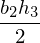

In [4]:
b2, h3 = symbols('b2 h3',real=True)
Area_d = Rational(1,2) * b2 * h3
Area_d

Se definen las coordenadas (x1,y1,x2,y2,x3,y3) de los vértices del triángulo _d_. Con las coordenadas, y el valor del área, se particulariza la expresión de la función de forma $N_3(x,y)$ al triángulo _d_.  

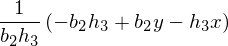

In [5]:
x1_d = 0
y1_d = h3
x2_d = b2
y2_d = 2*h3
x3_d = 0
y3_d = 2*h3
N3_d = N3.subs([(x1,x1_d),(x2,x2_d),(x3,x3_d),(y1,y1_d),(y2,y2_d),(y3,y3_d),(A,Area_d)])
N3_d

A continuación se determina la integral para definir la componente $x$ de $\mathbf{f}_5^d$

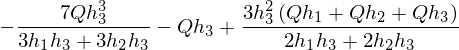

In [6]:
f5d_x = integrate(N3_d.subs(x,0) * tx,(y,h3,2*h3))
f5d_x.simplify()
f5d_x

### 2.2. Determinación del vector de fuerzas en 5 debido al elemento elemento _f_

Para este elemento se plantea nuevamente una referencia local, en la que se renumeran los nodos como 1-2-3. En este caso, se ha elegido la numeración 5-8-7 como la 1-2-3, según se muestra la figura. 

<img src="presa_elementof.PNG" width="50%" height="50%"/>


El nodo 5 del elemento _f_ es el nodo 1 en la referencia local. Por tanto, se determinará la integral siguiente: 

\begin{equation}
\mathbf{f}_5^f = \int_{\Gamma_f} \mathbf{N_{1}}^T \cdot \mathbf{t}\,d \Gamma
\end{equation}

Es decir

\begin{equation}
\mathbf{f}_5^f = \int_{\Gamma_f} \left( \begin{matrix} N_1 & 0 \\ 0 & N_1 \end{matrix} \right) \cdot \begin{pmatrix} t_x \\ t_y \end{pmatrix} \,d \Gamma
\end{equation}

Y teniendo nuevamente en cuenta que $t_y = 0$ y que $t_x$ es una función de $y$, la componente no nula a evaluar de $\mathbf{f}_5$ será

\begin{equation}
f_{5x}^d = \int_{h2}^{h1} N_1(0,y) \, t_x(y) \,dy
\end{equation}

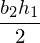

In [7]:
h1 = symbols('h1',real=True)
Area_f = Rational(1,2) * b2 * h1
Area_f

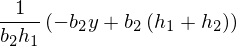

In [8]:
x1_f = 0
y1_f = h2
x2_f = b2
y2_f = h2+h1
x3_f = 0
y3_f = h2+h1
N1_f = N1.subs([(x1,x1_f),(x2,x2_f),(x3,x3_f),(y1,y1_f),(y2,y2_f),(y3,y3_f),(A,Area_f)])
N1_f

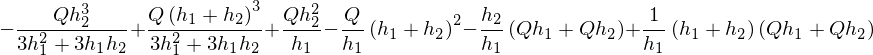

In [9]:
f5f_x = integrate(N1_f.subs(x,0) * tx,(y,h2,h2+h1))
f5f_x.simplify()
f5f_x

### 2.3. Evaluación numérica para unos parámetros establecidos 

A continuación se definene los valores numéricos de los parámetros. Para distinguirlos de los símbolos se le añade una "v", para indicar que son valores de los parámetros. 

In [10]:
h1_v = 10.
h2_v = 50.
h3_v = h2_v / 2.
Q_v = 10 * (h2_v + h1_v) # Se ha tomado el peso específico del agua como 10 kN/m3
b1_v = 50.
b2_v = 5.
f5dx= f5d_x.evalf(subs={Q:Q_v,h1:h1_v,h2:h2_v,h3:h3_v})
f5dx

In [11]:
f5fx= f5f_x.evalf(subs={Q:Q_v,h1:h1_v,h2:h2_v,h3:h3_v})
f5fx

Resultado final para la componente $x$ de $\mathbf{f}_5^{d+f}$

In [12]:
f5x = f5dx + f5fx
f5x

El vector de cargas nodales equivalentes en 5 debido a la acción del agua será: 

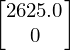

In [13]:
f5_agua = Matrix([f5x,0])
f5_agua

**Observación:**
En el elemento lineal triangular, puede demostrarse (mediante el PTV) que las fuerzas nodales equivalen a las que se obtendrían mediante un reparto coherente con las ecuaciones de la estática. 

Este resultado es práctico. Observe: 

- Para el caso de la componente debida al elemento _f_ , la carga triangular equivalente para el nodo 5 puede obtenerse tomando momentos en 7 e igualando el momento producido por la fuerza nodal $f_{5x}^f$ respecto a dicho nodo (actuando con un brazo de 10 m). 

\begin{equation}
f_{5x}^f \cdot 10 = \dfrac{100 \cdot 10}{2} \,\dfrac{2}{3} \cdot 10 \Rightarrow f_{5x}^f = 333.3 kN
\end{equation}

- Para el caso de la componente debida al elemento _d_ se obtiene el mismo resultado: transfiriendo la carga trapezoidal variable, desde 100 a 350 kN/m$^2$; observe que al nodo 5 le corresponde (descomponiendo la carga en rectangular más triangular):

\begin{equation}
f_{5x}^d = \dfrac{100 \cdot 25}{2} + \dfrac{250 \cdot 25}{2} \cdot \dfrac{1}{3} = 2291.667 kN
\end{equation}

## 3. Evaluación de las fuerzas nodales debido a cargas de peso propio

En este apartado se va a evaluar el vector de fuerzas por unidad de volumen debido a cargas de peso propio, en el nodo 4. 

Tal y como se vio en el cuaderno de MEF del Elemento Triangular, la expresión dentro de un elemento de este vector es la siguiente:  

\begin{equation}
\mathbf{f}^{(e)}_b = \dfrac{A^{(e)}}{3} \,\begin{pmatrix} 0 \\ -\rho \,g \\ 0 \\- \rho \,g  \\ 0 \\ -\rho \,g \end{pmatrix}
\end{equation}

Donde el superíndice (e) se ha empleado para indicar que los datos son los de un elemento en concreto. 

Observando la figura de la presa, vemos que el nodo 4 pertenece a los elementos (a,b,c). 

El vector de fuerzas volumétricas existe para todos los elementos. En este caso, 

\begin{equation}
\mathbf{f}_4 = \mathbf{f}_4^{a+b+c} = \mathbf{f}_4^{a} + \mathbf{f}_4^b + \mathbf{f}_4^c
\end{equation}

Observando la expresión de $\mathbf{f}_b$, la única dependencia del elemento es el área de cada elemento. Por tanto, evaluar el vector de fuerzas por unidad de volumen es sencillo. Basta con evaluar las áreas de cada triángulo, y "enviar" 1/3 del valor total al nodo 4. Finalmente, considerar el peso específico, que en este caso es directamente el producto $\rho\,g$ y toma el valor 25 kN/m$^3$.


Area triángulo a 625.0
Area triángulos b y c (áreas iguales) 343.75
Fuerza vertical en 4 debida a peso propio -10937.5


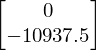

In [14]:
gamma_h = 25
A_a = 1/2. * b1_v * h3_v
A_b = 1/2. * (b2_v + b1_v)/2 * h3_v
A_c = A_b
print "Area triángulo a", A_a
print "Area triángulos b y c (áreas iguales)", A_b
f4y = -gamma_h * 1/3.*(A_a + A_b + A_c)
print "Fuerza vertical en 4 debida a peso propio", f4y
f4_peso = Matrix([0,f4y])
f4_peso

## 4. Evaluación de un término de la matriz de rigidez completa.

A continuación se evalúa un término concreto de la matriz de rigidez. Se evaluará $\mathbf{K_{58}}$. 

Los elementos $e$ y $f$ contribuyen a este término. Por tanto: 

\begin{equation}
\mathbf{K_{58}} = \mathbf{K_{58}}^{e + f} = \mathbf{K_{58}}^{e}+ \mathbf{K_{58}}^{f}
\end{equation}

### Problema elástico de deformación plana. 

Evaluaremos en primer lugar los vales de d11, d12, d33, correspondientes a deformación plana: 

In [15]:
E = 30E6
n = 0.25
G = E / (2 * (1 + n))
d33 = G
d11 = E * (1 - n) / ( (1 + n) * (1 - 2 * n))
d12 = n / (1 - n) * d11

### 4.1. Componente de la matriz en el elemento _e_

En primer lugar es necesario definir un sentido de numeración. Eligiendo el nodo 5 como nodo 1 local, planteamos:

    (5,6,8) en global se referencia como (1,2,3) en local. (Sentido de recorrido antihorario). 

El término $\mathbf{K_{58}}^e$ es $\mathbf{K_{13}}$ en locales. 

Su expresión puede tomarse del cuaderno del Elemento de 3 nodos

\left[\begin{matrix}\frac{b_{1} b_{3} d_{11}}{4 A} + \frac{c_{1} c_{3} d_{33}}{4 A} & \frac{b_{1} c_{3} d_{12}}{4 A} + \frac{b_{3} c_{1} d_{33}}{4 A}\\\frac{b_{1} c_{3} d_{33}}{4 A} + \frac{b_{3} c_{1} d_{12}}{4 A} & \frac{b_{1} b_{3} d_{33}}{4 A} + \frac{c_{1} c_{3} d_{11}}{4 A}\end{matrix}\right]

In [16]:
(x1,y1) = 0, h2_v
(x2,y2) = b2_v,h2_v
(x3,y3) = b2_v,h2_v + h1_v
A = 1/2. * b2_v * h1_v

(b1, b2, b3, c1, c2, c3) = y2 - y3, y3-y1, y1-y2, x3-x2, x1-x3, x2-x1

k58_c = np.array([[b1*b3*d11/(4*A) + c1*c3*d33/(4*A), b1*c3*d12/(4*A) + b3*c1*d33/(4*A)], [b1*c3*d33/(4*A) + b3*c1*d12/(4*A), b1*b3*d33/(4*A) + c1*c3*d11/(4*A)]])

In [17]:
print k58_c

[[       0. -6000000.]
 [-6000000.        0.]]


### 4.2. Componente de la matriz en el elemento _f_

En primer lugar es necesario definir un sentido de numeración. Eligiendo el nodo 5 como nodo 1 local, planteamos

    (5,8,7) en global se referencia como (1,2,3) en local. (Sentido de recorrido antihorario).

El término $\mathbf{K_{58}}^f$ será $\mathbf{K_{12}}$ en planteamiento local.

Su expresión es: 

\left[\begin{matrix}\frac{b_{1} b_{2} d_{11}}{4 A} + \frac{c_{1} c_{2} d_{33}}{4 A} & \frac{b_{1} c_{2} d_{12}}{4 A} + \frac{b_{2} c_{1} d_{33}}{4 A}\\\frac{b_{1} c_{2} d_{33}}{4 A} + \frac{b_{2} c_{1} d_{12}}{4 A} & \frac{b_{1} b_{2} d_{33}}{4 A} + \frac{c_{1} c_{2} d_{11}}{4 A}\end{matrix}\right]



In [18]:
(x1,y1) = 0, h2_v
(x2,y2) = b2_v,h2_v + h1_v
(x3,y3) = 0,   h2_v + h1_v
A = 1/2. * b2_v * h1_v

(b1, b2, b3, c1, c2, c3) = y2-y3, y3-y1, y1-y2, x3-x2, x1-x3, x2-x1

k58_f = np.array([[b1*b2*d11/(4*A) + c1*c2*d33/(4*A), b1*c2*d12/(4*A) + b2*c1*d33/(4*A)], [b1*c2*d33/(4*A) + b2*c1*d12/(4*A), b1*b2*d33/(4*A) + c1*c2*d11/(4*A)]])


In [19]:
print k58_f

[[       0. -6000000.]
 [-6000000.        0.]]


Finalmente, sumando ambas matrices, se obtiene: 

In [20]:
k58 = k58_c + k58_f
print k58

[[        0. -12000000.]
 [-12000000.         0.]]
